# Louvain

This notebook illustrates the hierarchical clustering of graphs by the [Louvain hierarchical algorithm](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html).

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.hierarchy import LouvainHierarchy
from sknetwork.hierarchy import cut_straight, dasgupta_score, tree_sampling_divergence
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph, svg_dendrogram

## Graphs

In [4]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position

In [5]:
# hierarchical clustering
louvain_hierarchy = LouvainHierarchy()
dendrogram = louvain_hierarchy.fit_transform(adjacency)

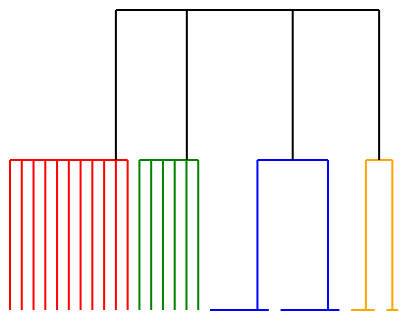

In [6]:
image = svg_dendrogram(dendrogram)
SVG(image)

In [7]:
# cuts
labels = cut_straight(dendrogram)
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [8]:
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=4, return_dendrogram=True)
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 1 2 2 1 1 2 1 1]


In [9]:
_, counts = np.unique(labels, return_counts=True)

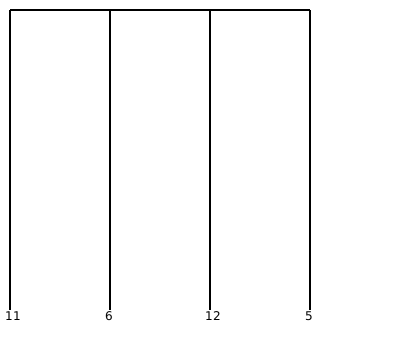

In [10]:
image = svg_dendrogram(dendrogram_aggregate, names=counts, rotate_names=False)
SVG(image)

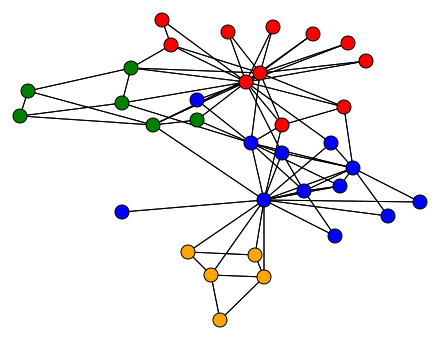

In [11]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [12]:
# metrics
dasgupta_score(adjacency, dendrogram)

0.6496983408748115

## Directed graphs

In [13]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

In [15]:
# hierarchical clustering
louvain_hierarchy = LouvainHierarchy()
dendrogram = louvain_hierarchy.fit_transform(adjacency)

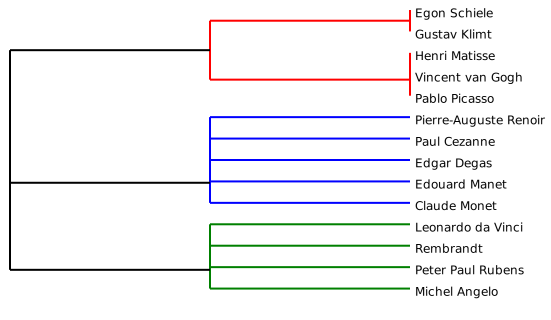

In [16]:
image = svg_dendrogram(dendrogram, names, rotate=True)
SVG(image)

In [17]:
# cut with 3 clusters
labels = cut_straight(dendrogram, n_clusters = 3)
print(labels)

[1 0 2 0 2 2 1 0 1 2 1 0 0 1]


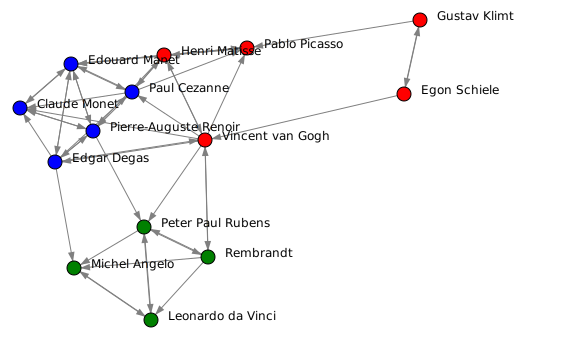

In [18]:
image = svg_digraph(adjacency, position, names=names, labels=labels)
SVG(image)

In [19]:
# metrics
dasgupta_score(adjacency, dendrogram)

0.5685714285714286

## Bipartite graphs

In [20]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

In [21]:
# hierarchical clustering
louvain_hierarchy = LouvainHierarchy()
louvain_hierarchy.fit(biadjacency)
dendrogram_row = louvain_hierarchy.dendrogram_row_
dendrogram_col = louvain_hierarchy.dendrogram_col_
dendrogram_full = louvain_hierarchy.dendrogram_full_

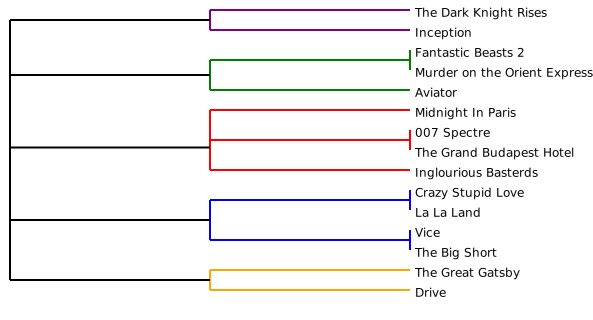

In [22]:
image = svg_dendrogram(dendrogram_row, names_row, n_clusters=4, rotate=True)
SVG(image)

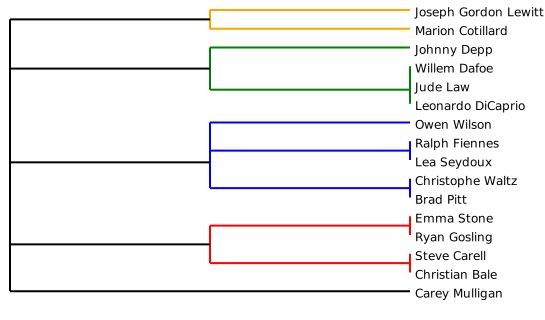

In [23]:
image = svg_dendrogram(dendrogram_col, names_col, n_clusters=4, rotate=True)
SVG(image)

In [24]:
# cuts
labels = cut_straight(dendrogram_full, n_clusters = 4)
n_row = biadjacency.shape[0]
labels_row = labels[:n_row]
labels_col = labels[n_row:]

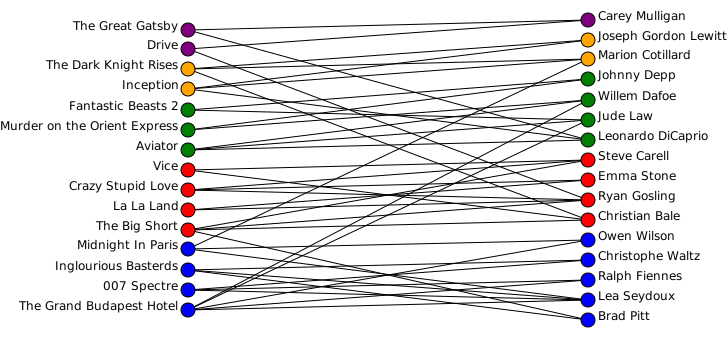

In [25]:
image = svg_bigraph(biadjacency, names_row, names_col, labels_row, labels_col)
SVG(image)